In [ ]:
import pandas as pd
import numpy as np

# Repaso Pandas
Vamos a crear un dataframe y recordar los principales comandos vistos en clases anteriores, además de ver comandos nuevos que vamos a usar en la parte final de los ejercicios. Vamos a repasar los siguientes conceptos.
EJERCICIO ANTERIOR
1. Creación y modificación de df:
  * [rename](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)
  * [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)
2. Búsqueda de datos:
  * [head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)
  * [tail](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html)
  * [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)
  * [loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)
  * [iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)
  * [values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html)
  * [unique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.SeriesGroupBy.unique.html?highlight=unique)
  * [nunique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html)
3. Funciones:
  * [any](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html): Utilizaremos la funcion apply cuando queremos aplicar una funcion a todos los elementos de nuestra DF.
  * [map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html): Utilizaremos la función map cuando queremos aplicar una funcion a todos los elementos de una columna. La función Map() toma como argumento otra función, que contiene el código que queremos aplicar a cada elemento de la lista o columna.

  La principal diferencia entre ellos es que applymap es un función basada en elementos que trabaja en el dataframe, mientras map lo hace en las series, o sea una columna o una fila.

In [ ]:
#REPASO
#Paso 1. Creamos un dataframe llamado alumnos el cual va a tener tres columnas con los siguientes valores:
# Nombre: Julian,Maria,Gonzalo - STRING
# Empresa: Eci, Bankia, BBVA - STRING
# Edad: 25,30,35 - INTEGER
# Id_Usuario: 1,2,3
#Además ponemos un índice con valores A,B,C
alumnos=pd.DataFrame(
    {
        "Nombre": ["Julian","Maria","Gonzalo"],
        "Empresa":["Eci","Bankia","BBVA"],
        "Edad":[25,30,35],
        "Id_Usuario":[1,2,3]
    },index=["A","B","C"]
)
alumnos

,Nombre,Empresa,Edad,Id_Usuario
A,Julian,Eci,25,1
B,Maria,Bankia,30,2
C,Gonzalo,BBVA,35,3


In [ ]:
#REPASO
#Paso 1.2 Creamos un dataframe con los mismos valores que el df de alumnos, llamado alumnos_duplicados
# Nombre: Julian,Julian,Gonzalo
# Empresa: Eci, Bankia, BBVA
# Edad: 25,30,35* Incluimos los valores de EDAD como STRING
#Además ponemos un índice con valores 1,2,3
alumnos_duplicados=pd.DataFrame(
    {
        "Nombre": ["Julian","Julian","Gonzalo"],
        "Empresa":["TheValley","Empresa A","Empresa B"],
        "Edad":["25","30","35"],
    },index=["1","2","3"]
)
alumnos_duplicados

,Nombre,Empresa,Edad
1,Julian,TheValley,25
2,Julian,Empresa A,30
3,Gonzalo,Empresa B,35


In [ ]:
alumnos[alumnos.Nombre == 'Julian']

In [ ]:
alumnos[alumnos['Nombre'] == 'Julian']

In [ ]:
alumnos[0:2]

In [ ]:
#NUEVO
#Paso 2. Vamos a poner la columna Id_Usuario como índice.
# Para eso usamos el comando set_index, el cual nos permite colocar una columna como índice
alumnos=alumnos.set_index('Id_Usuario')
alumnos

,Nombre,Empresa,Edad
Id_Usuario,,,
1,Julian,Eci,25
2,Maria,Bankia,30
3,Gonzalo,BBVA,35


In [ ]:
#REPASO
#Paso 3. Le vamos a añadir dos nuevas columnas y vamos a incluir los siguientes valores.
# Puesto_Empresa: CDO, NaN (Valor vacío), Data Engineering 
# Columnar_A_Eliminar: fila1, fila2, fila3
alumnos['Puesto_Empresa']=["CDO",np.nan,"Data Engineering"]
alumnos["Columna_A_Eliminar"]=["fila1","fila2","fila3"]
alumnos

,Nombre,Empresa,Edad,Puesto_Empresa,Columna_A_Eliminar
Id_Usuario,,,,,
1,Julian,Eci,25,CDO,fila1
2,Maria,Bankia,30,NaN,fila2
3,Gonzalo,BBVA,35,Data Engineering,fila3


In [ ]:
#NUEVO
#Paso 4.1. Ahora eliminamos la columna Columna_A_Eliminar, usamos el método DROP para eso.
#Hay que pasarle como parámetros la columna a eliminar y el AXIS
#¿Qué es AXIS?, parámetro el cual nos indica si queremos eliminar una fila o una columna, siendo 0 filas y 1 columnas
#Por defecto te coge siempre el 0
alumnos=alumnos.drop(['Columna_A_Eliminar'],axis=1)
alumnos

,Nombre,Empresa,Edad,Puesto_Empresa
Id_Usuario,,,,
1,Julian,Eci,25,CDO
2,Maria,Bankia,30,NaN
3,Gonzalo,BBVA,35,Data Engineering


In [ ]:
#REPASO
#Paso 4.2. Vamos a renombrar la nueva columna que hemos creado que nos queda.
# Pasará a llamarse Puesto en vez de Puesto_empresa, tenemos que poner el parámetro inplace a TRUE porque si no, no se guarda dicho valor.
# Eso lo hacemos con el comando rename, al cual le pasamos un diccionario con el nombre antiguo y el nuevo.
new_name = {"Puesto_Empresa":"Puesto"}
alumnos.rename({"Puesto_Empresa":"Puesto"},inplace=True)
alumnos

,Nombre,Empresa,Edad,Puesto_Empresa
Id_Usuario,,,,
1,Julian,Eci,25,CDO
2,Maria,Bankia,30,NaN
3,Gonzalo,BBVA,35,Data Engineering


In [ ]:
#REPASO
#Paso 5.1. Vamos a ver solo la primera fila de valores del df alumnos con head.
#Por defecto te coge 5 filas si no le pones algún nº como parámetro
alumnos.head(1)

,Nombre,Empresa,Edad,Puesto_Empresa
Id_Usuario,,,,
1,Julian,Eci,25,CDO


In [ ]:
#NUEVO
#Paso 5.2. Vamos a ver la última fila de valores del df alumnos (Sin usar head).
# La otra opción es usar tail.
#Por defecto te coge 5 filas si no le pones algún nº como parámetro
alumnos.tail(1)

,Nombre,Empresa,Edad,Puesto_Empresa
Id_Usuario,,,,
3,Gonzalo,BBVA,35,Data Engineering


In [ ]:
#REPASO
#Paso 6. Vamos a ver las columnas que tenemos del df alumnos. ¿Nos acordamos cómo?
alumnos.columns

Index(['Nombre', 'Empresa', 'Edad', 'Puesto_Empresa'], dtype='object')

In [ ]:
#NUEVO
#Paso 7. Ahora queremos ver el formato específico de la columna Edad.
#Para ello usamos el método dtype
alumnos_duplicados["Edad"].dtype

dtype('O')

In [ ]:
#NUEVO
#Paso 8. Sacamos una descripción de nuestro dataframe.
alumnos.describe()

,Edad
count,3.0
mean,30.0
std,5.0
min,25.0
25%,27.5
50%,30.0
75%,32.5
max,35.0


In [ ]:
#NUEVO
#Paso 9. Queremos copiar nuestro dataframe a uno nuevo, lo podemos hacer de dos maneras.
df1=alumnos
df1
df2=alumnos.copy()
df2

,Nombre,Empresa,Edad,Puesto_Empresa
Id_Usuario,,,,
1,Julian,Eci,25,CDO
2,Maria,Bankia,30,NaN
3,Gonzalo,BBVA,35,Data Engineering


In [ ]:
#REPASO
#Paso 10.1. Como visualizar un dataframe. Primero vamos a seleccionar solo la columna Empresa.
alumnos["Empresa"]

Id_Usuario
1       Eci
2    Bankia
3      BBVA
Name: Empresa, dtype: object

In [ ]:
alumnos

,Nombre,Empresa,Edad,Puesto_Empresa
Id_Usuario,,,,
1,Julian,Eci,25,CDO
2,Maria,Bankia,30,NaN
3,Gonzalo,BBVA,35,Data Engineering


In [ ]:
#REPASO
#Paso 10.2. Como visualizar un dataframe. Vamos a seleccionar los valores de la fila dos, columna EMPRESA. Usaremos loc para eso.
alumnos_duplicados.loc["2","Empresa"]

'Bankia'

In [ ]:
#REPASO
#Paso 10.2. Como visualizar un dataframe. Vamos a seleccionar los valores de la fila dos, columna EMPRESA. Usaremos iloc para eso.
alumnos.iloc[0,1]

'Eci'

In [ ]:
#NUEVO
#Paso 10.3. Como visualizar un dataframe. Vamos a seleccionar los valores de la fila dos, columna EMPRESA. Usaremos values para eso.
alumnos.values[1][1]

'Bankia'

In [ ]:
#NUEVO
#Paso 10.4. Si queremos ver los valores unicos hay varias maneras.
#Primero sabiendo solo los valores diferentes de una solo columna.
#Para ello usamos unique, que nos permite diferenciar dichos valores
alumnos["Empresa"].unique()

array(['Eci', 'Bankia', 'BBVA'], dtype=object)

In [ ]:
#NUEVO
#Paso 10.5. Si queremos ver los valores unicos hay varias maneras.
#Segundo sabiendo el número de los valores únicos por columna.
#En este caso usamos nunique
alumnos["Empresa"].nunique()

3

In [ ]:
alumnos

,Nombre,Empresa,Edad,Puesto_Empresa
Id_Usuario,,,,
1,Julian,Eci,25,CDO
2,Maria,Bankia,30,NaN
3,Gonzalo,BBVA,35,Data Engineering


In [ ]:
#REPASO
#Paso 11.1. Modificar datos. Vamos a actualizar la información del valor que hay en la fila 3, Columna Nomnbre. Usaremos loc para eso.
# Lo vamos a cambiar por Lucia
alumnos.loc[3,"Nombre"]="Lucia"
alumnos

,Nombre,Empresa,Edad,Puesto_Empresa
Id_Usuario,,,,
1,Julian,Eci,25,CDO
2,Maria,Bankia,30,NaN
3,Lucia,BBVA,35,Data Engineering


In [ ]:
#REPASO
#Paso 11.2. Modificar datos. Vamos a actualizar la información del valor que hay en la fila 3, Columna Empresa. Usaremos iloc para eso.
# Lo vamos a cambiar por TheValley
alumnos.iloc[2,1]="TheValley"
alumnos

,Nombre,Empresa,Edad,Puesto_Empresa
Id_Usuario,,,,
1,Julian,Eci,25,CDO
2,Maria,Bankia,30,NaN
3,Lucia,TheValley,35,Data Engineering


In [ ]:
#REPASO
#Paso 11.3. Modificar datos. Vamos a actualizar la información del valor que hay en la fila 3, Columna Edad. Usaremos at para eso.
# Lo vamos a cambiar por 50
alumnos.at[3,'Edad']=50
alumnos

,Nombre,Empresa,Edad,Puesto_Empresa
Id_Usuario,,,,
1,Julian,Eci,25,CDO
2,Maria,Bankia,30,NaN
3,Lucia,TheValley,50,Data Engineering


In [ ]:
#REPASO
#Paso 12.1. Buscar información. Mediante isin() podemos buscar valores de un dataframe dentro de otro df.
#Vamos a buscar en alumnos que valores hay de alumnos_duplicados
alumnos.isin(alumnos_duplicados)

,Nombre,Empresa,Edad,Puesto_Empresa
Id_Usuario,,,,
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False


In [ ]:
#REPASO
#Paso 12.2. Buscar información. Si queremos pasarle una simple cadena la tenemos que meter como si fuera un array. También con isin()
#Buscar la cadena Gonzalo
alumnos.isin(["Julian"])

,Nombre,Empresa,Edad,Puesto_Empresa
Id_Usuario,,,,
1,True,False,False,False
2,False,False,False,False
3,False,False,False,False


In [ ]:
#REPASO APPLY/MAP
#1. Vamos a crear un nuevo dataframe llamada prueba_map
#.  El dataframe va a estar formado por dos columnas llamadas:
# - Ingresos - Valores: 100,50,25
# - Num_Transferencias_Realizadas - Valores: 4,10,25
prueba_map = pd.DataFrame({"Ingresos":[100,50,25],"Num_Transferencias_Realizadas": [4,10,25]})
prueba_map

,Ingresos,Num_Transferencias_Realizadas
0,100,4
1,50,10
2,25,25


In [ ]:
#2. Por otro lado, vamos a crear una función nueva que la vamos a llamar sumar_cinco y le vamos a pasar un parámetro al cual se le va a sumar cinco
def sumar_cinco(x):
  return x+5


In [ ]:
#3. Ahora vamos a aplicar dicha función a una de nuestras columnas. La col ingresos
prueba_map.Ingresos.map(sumar_cinco)

0    105
1     55
2     30
Name: Ingresos, dtype: int64

In [ ]:
#4. ¿Que pasa si lo hacemos con apply en vez de que con Map?
prueba_map.apply(sumar_cinco)

,Ingresos,Num_Transferencias_Realizadas
0,105,9
1,55,15
2,30,30


In [ ]:
#5. Vamos a crear un nuevo dataframe, llamado prueba_error, que tenga una columna más con texto
prueba_error = pd.DataFrame({"Ingresos":[100,50,25],"Num_Transferencias_Realizadas": [4,10,25], "Cuenta_Bancaria":["XXQ","BAS","PKI"]})
prueba_error.dtypes

Ingresos                          int64
Num_Transferencias_Realizadas     int64
Cuenta_Bancaria                  object
dtype: object

In [ ]:
#6. Ahora vamos a aplicar el apply otra vez para ver que ocurre
prueba_error.apply(sumar_cinco)
#En este caso da error porque logicamente una de nuestra columnas es un string y no funciona, pero podemos arreglar esto en nuestra función

TypeError: ignored

In [ ]:
#7. Ahora vamos a crear otra funcion con lambda
lambda x,y : x + y
#Para usarla vamos a incluira en una variable (no es estrictamente necesario)
funcion_lambda = lambda x : x + 5
suma_dos = prueba_map['Ingresos'].map(funcion_lambda)
suma_dos = prueba_map.apply(lambda x : x + 5)
suma_dos

,Ingresos,Num_Transferencias_Realizadas
0,105,9
1,55,15
2,30,30


# Limpieza de vacíos
Vamos a trabajar con los siguientes métodos nuevos y que nos sirven para enriquecer toda la capa de transformación de los datos.
* [isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html?highlight=isnull#pandas.DataFrame.isnull). No necesita parámetros de entrada
* [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html). Parámetro a modificar, enteros o cadenas
* [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html). No necesita parámetros de entrada

In [ ]:
#NUEVO
#Paso 13.1. En este caso vamos a ver dos funciones que nos sirven para eliminar y rellenar valores vacíos.
#Primero vamos a encontrar los valores nulos
alumnos.isnull()

,Nombre,Empresa,Edad,Puesto
Id_Usuario,,,,
1,False,False,False,False
2,False,False,False,True
3,False,False,False,False


In [ ]:
#NUEVO
#Paso 13.2. En este caso vamos a ver dos funciones que nos sirven para eliminar y rellenar valores vacíos.
#Primero vamos a rellenar los vacíos con 0 y se lo pasamos como parámetro
alumnos.fillna(0)

,Nombre,Empresa,Edad,Puesto
Id_Usuario,,,,
1,Julian,Eci,25,CDO
2,Maria,Bankia,30,0
3,Lucia,TheValley,50,Data Engineering


In [ ]:
#NUEVO
#Paso 13.3. En este caso vamos a ver dos funciones que nos sirven para eliminar y rellenar valores vacíos.
#Ahora vamos a eliminar la fila que tienen valores vacíos
#Al igual que con drop hay que pasarle como parámetros el AXIS
#¿Qué es AXIS?, parámetro el cual nos indica si queremos eliminar una fila o una columna, siendo 0 filas y 1 columnas
#Por defecto te coge siempre el 0
alumnos.dropna()

,Nombre,Empresa,Edad,Puesto
Id_Usuario,,,,
1,Julian,Eci,25,CDO
3,Lucia,TheValley,50,Data Engineering


In [ ]:
#NUEVO
#Paso 13.4. En este caso vamos a ver dos funciones que nos sirven para eliminar y rellenar valores vacíos.
#Ahora vamos a eliminar la columna que tienen valores vacíos
alumnos.dropna(axis=1)

,Nombre,Empresa,Edad
Id_Usuario,,,
1,Julian,Eci,25
2,Maria,Bankia,30
3,Lucia,TheValley,50


In [ ]:
alumnos

NameError: ignored

# Cadenas de texto
Existen un conjunto de métodos relaciondas con las cadenas de texto que nos sirven para modificar, buscar y limpiar dichas cadenas.
* [upper](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.upper.html). No necesita parámetros de entrada
* [lower](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.lower.html). No necesita parámetros de entrada
* [title](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.title.html). No necesita parámetros de entrada
* [swapcase](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.swapcase.html). No necesita parámetros de entrada
* [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.replace.html). Hay que introducir como parámetros, primero el elemento a buscar, acto seguido, el elemento a reemplazar.
* [strip](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.strip.html). No necesita parámetros de entrada
* [contains](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html). Hay que introducir el valor a buscar como parámetro.


In [ ]:
#NUEVO
#Paso 14.1. Cadenas de texto. Vamos a ver diferentes metodos para tratar las cadenas de texto
#Primero vamos a convertir todos los valores de la columna Nombre a mayúsculas
alumnos["Nombre"].str.upper()

Id_Usuario
1    JULIAN
2     MARIA
3     LUCIA
Name: Nombre, dtype: object

In [ ]:
#NUEVO
#Paso 14.2. Cadenas de texto. Vamos a ver diferentes metodos para tratar las cadenas de texto
#Segund vamos a convertir todos los valores de la columna Empresa a minúsculas
alumnos["Empresa"].str.lower()

Id_Usuario
1          eci
2       bankia
3    thevalley
Name: Empresa, dtype: object

In [ ]:
#NUEVO
#Paso 14.3. Cadenas de texto. Vamos a ver diferentes metodos para tratar las cadenas de texto
#Tercer vamos a convertir todos los valores de la columna Puesto como si fuera un título, primera mayúscula, resto minúscula
alumnos["Puesto"].str.title()

Id_Usuario
1                 Cdo
2                 NaN
3    Data Engineering
Name: Puesto, dtype: object

In [ ]:
alumnos

,Nombre,Empresa,Edad,Puesto
Id_Usuario,,,,
1,Julian,Eci,25,CDO
2,Maria,Bankia,30,NaN
3,Lucia,TheValley,50,Data Engineering


In [ ]:
#NUEVO
#Paso 14.4. Cadenas de texto. Vamos a ver diferentes metodos para tratar las cadenas de texto
#Cuarto vamos a convertir todos los valores de la columna Puesto y les vamos a "dar la vuelta", es decir las mayúsculas van a ser minúsculas y viceversa
alumnos["Puesto"].str.swapcase()

Id_Usuario
1                 cdo
2                 NaN
3    dATA eNGINEERING
Name: Puesto, dtype: object

In [ ]:
#NUEVO
#Paso 14.5. Cadenas de texto. Vamos a ver diferentes metodos para tratar las cadenas de texto
#Cinco, vamos a reemplazar un valor dentro de la columna de Empresa. Queremos cambiar  Eci por Mercadona
alumnos["Empresa"].str.replace('The','El')

In [ ]:
alumnos

In [ ]:
#NUEVO
#Paso 14.6. Cadenas de texto. Vamos a ver diferentes metodos para tratar las cadenas de texto
#Seis, vamos a quitar la cadena de Data dentro de una cadena de la columna Puesto.
alumnos["Puesto"].str.strip("Data")

Id_Usuario
1             CDO
2             NaN
3     Engineering
Name: Puesto, dtype: object

In [ ]:
#NUEVO
#Paso 14.7. Cadenas de texto. Vamos a ver diferentes metodos para tratar las cadenas de texto
#Siete, vamos a buscar el texto Data en la columna de puesto
#Como parámetro tenemos que meter el tipo de formato a cambiar.
#Además solo se puede realizar sobre una columna o serie, no sobre todo el DF
alumnos["Puesto"].str.contains("Data")

Id_Usuario
1    False
2      NaN
3     True
Name: Puesto, dtype: object

# Limpieza de duplicados y formatos
Tambien tenemos métodos para encontrar duplicados y cambiar formatos, métodos que nos sirven para enriquecer nuestro fichero.
* [duplicated](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html). Solo funciona a nivel de columna o serie, nunca a nivel de df.
* [drop_duplicates](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html). No necesita parámetros de entrada.
* [astype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.*html*). Hay que pasarle el formato al que queremos modificar la columna (int32, String, etc)

In [ ]:
#NUEVO
#Paso 15.1. Seguimos con métodos de limpieza, vamos a encontrar los valores duplicados
#Vamos a usar el dataframe que creamos al principio para buscarlos
alumnos_duplicados["Nombre"].duplicated()

1    False
2     True
3    False
Name: Nombre, dtype: bool

In [ ]:
#NUEVO
#Paso 15.2. Seguimos con métodos de limpieza, vamos a eliminar las filas con dichos valores duplicados
alumnos_duplicados["Nombre"].drop_duplicates()

1     Julian
3    Gonzalo
Name: Nombre, dtype: object

In [ ]:
#NUEVO
#Paso 16. Ahora queremos cambiar el formato de uno de los campos que hemos visto que no tiene sentido, es decir la EDAD que está en STRING
#Para ello usamos astype el cual nos permite modificar dichos valores
alumnos_duplicados["Edad"].astype("int64")

1    25
2    30
3    35
Name: Edad, dtype: int64

# Ejercicios a realizar solos
Ahora poco a poco vamos a ir intentando realizar los ejercicios con ficheros más grandes y con las funciones vistas anteriormente

In [ ]:
#Paso 1. Leamos el siguiente csv y llamamos al DF libros
libros = pd.read_csv("https://raw.githubusercontent.com/cherryguille/pandas_classroom/main/BL-Flickr-Images-Book.csv")
libros


In [ ]:
#Paso 2. Ver las primeras 5 entradas del df de libros
libros.head()

In [ ]:
#Paso 3. Queremos eliminar las columnas que tiene algun valor vacío, cuidado SOLO LAS COLUMNAS
libros.dropna(axis=1)

In [ ]:
#Paso 4. Convertimos la columna de Title y Contributors con la primera mayúscula y el resto minúsculas
libros["Title"].str.title()
libros["Contributors"].str.title()

In [ ]:
#Paso 5. Vamos a ver que columnas tienen valores únicos, primero viendo los valores únicos de TODAS las columnas.
#libros['Identifier'].is_unique
#libros.duplicated(keep=True)
libros.nunique()
#salida=libros['Identifier'].nunique()
#salida
#libros['Identifier'].unique


In [ ]:
#Paso 6. Nos han informado que hay un error en el fichero y que la columna Place of Publication	las ciudad London son una errata que tenemos que modificar por Manchester.
#Reemplazamos dicho valor del df
libros["Place of Publication"].str.replace('London','Manchester') 

In [ ]:
#Paso 7. Vamos a leer el otro fichero y lo vamos a llamar olimpiadas
#Cuidado!! La primera fila es la cabecera, tenemos que poner Header = 1 para que caputre la primera fila
olimpiadas=pd.read_csv('https://raw.githubusercontent.com/cherryguille/pandas_classroom/main/olympics.csv', header=1)
olimpiadas

In [ ]:
#Paso 8. Vamos a renombrar y cambiar los valores de las columnas siguientes:
#01 !: Oro
#02 !: Plata
#03 !: Bronce
#? Winter: Olimpiadas_Invierno
#Total: Total_Invierno
#01 !.1: Oro
#02 !.1: Plata
#03 !.1: Bronce
#Total.1: Total_Verano              
#? Games: Total_Juegos
#01 !.2: Oro
#02 !.2: Plata
#03 !.2: Bronce
new_names =  {'Unnamed: 0': 'Country',
               '? Summer': 'Olimpiadas_Verano',
               '01 !': 'Oro',
               '02 !': 'Plata',
               '03 !': 'Bronce',
               '? Winter': 'Olimpiadas_Invierno',
               'Total': 'Total_Invierno',
               '01 !.1': 'Oro',
               '02 !.1': 'Plata',
               '03 !.1': 'Bronce',
               'Total.1': 'Total_Verano',              
               '? Games': 'Total_Juegos',
               '01 !.2': 'Oro',
               '02 !.2': 'Plata',
               '03 !.2': 'Bronce'}
olimpiadas.rename(columns=new_names, inplace=True)
olimpiadas

# DEJA TU FEEDBACK Y AYUDANOS A MEJORAR :) 

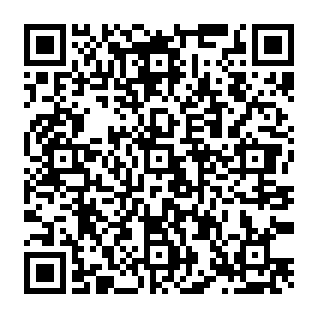